In [117]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 3.1

solve the $1D$ Poisson equation, written in the form $\frac{\delta^{2}\phi}{\delta x^{2}} = 1 $, on a regular grid of $101$ points with the finite differences and visualize the solution. The Model length is $\text{1000 km}$. Use sparse initialization for the matrix of coefficients {$L$}, i.e. $L = sparse(101, 101)$. Compose a matrix {$L$} and a right hand side vector {$R$} and obtain the solution vector {$S$} with a direct solver. Use $\phi = 0$ as the boundary condition for the two external nodes of the grid.

Gerya - Introduction to Numerical Geodynamic Modelling (2019)

In [118]:
# parameters
length = 1000000           # in meters
n = 101                   # number of nodes
h =  length / (n - 1)    # step size

In [119]:
h

10000.0

the matrix L,

In [120]:
L = np.zeros((n, n))
L

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

the vector R,

In [121]:
R = np.zeros(n)
R

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

phi = 0

In [122]:
L[0, 0] = 1
R[0] = 1

In [123]:
for i in range(1, n - 1):
    # d2phi/dx2=1
    # (phi(i-1)-2*phi(i)+phi(i+1))/dx^2=1
    L[i, i - 1] = 1 / h**2
    L[i, i] = -2 / h**2
    L[i, i + 1] = 1 / h**2
    R[i] = 1

In [124]:
# Last point: phi=0
L[n - 1, n - 1] = 1
R[n - 1] = 0

we can use numpy's built-in function "np.linalg.solve()" which is used to solve a system of linear equations. Given a square matrix A and a vector b, this function computes the solution vector x such that Ax = b

So in our case it's Lx = R (or LS = R), and we are solving for x.

In [125]:
# Obtaining vector of solutions S()
S = np.linalg.solve(L, R)

# Creating vector for nodal point positions
x = np.linspace(0, length, n)

In [126]:
S

array([ 1.0000e+00, -4.9500e+09, -9.8000e+09, -1.4550e+10, -1.9200e+10,
       -2.3750e+10, -2.8200e+10, -3.2550e+10, -3.6800e+10, -4.0950e+10,
       -4.5000e+10, -4.8950e+10, -5.2800e+10, -5.6550e+10, -6.0200e+10,
       -6.3750e+10, -6.7200e+10, -7.0550e+10, -7.3800e+10, -7.6950e+10,
       -8.0000e+10, -8.2950e+10, -8.5800e+10, -8.8550e+10, -9.1200e+10,
       -9.3750e+10, -9.6200e+10, -9.8550e+10, -1.0080e+11, -1.0295e+11,
       -1.0500e+11, -1.0695e+11, -1.0880e+11, -1.1055e+11, -1.1220e+11,
       -1.1375e+11, -1.1520e+11, -1.1655e+11, -1.1780e+11, -1.1895e+11,
       -1.2000e+11, -1.2095e+11, -1.2180e+11, -1.2255e+11, -1.2320e+11,
       -1.2375e+11, -1.2420e+11, -1.2455e+11, -1.2480e+11, -1.2495e+11,
       -1.2500e+11, -1.2495e+11, -1.2480e+11, -1.2455e+11, -1.2420e+11,
       -1.2375e+11, -1.2320e+11, -1.2255e+11, -1.2180e+11, -1.2095e+11,
       -1.2000e+11, -1.1895e+11, -1.1780e+11, -1.1655e+11, -1.1520e+11,
       -1.1375e+11, -1.1220e+11, -1.1055e+11, -1.0880e+11, -1.06

In [127]:
x

array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
         60000.,   70000.,   80000.,   90000.,  100000.,  110000.,
        120000.,  130000.,  140000.,  150000.,  160000.,  170000.,
        180000.,  190000.,  200000.,  210000.,  220000.,  230000.,
        240000.,  250000.,  260000.,  270000.,  280000.,  290000.,
        300000.,  310000.,  320000.,  330000.,  340000.,  350000.,
        360000.,  370000.,  380000.,  390000.,  400000.,  410000.,
        420000.,  430000.,  440000.,  450000.,  460000.,  470000.,
        480000.,  490000.,  500000.,  510000.,  520000.,  530000.,
        540000.,  550000.,  560000.,  570000.,  580000.,  590000.,
        600000.,  610000.,  620000.,  630000.,  640000.,  650000.,
        660000.,  670000.,  680000.,  690000.,  700000.,  710000.,
        720000.,  730000.,  740000.,  750000.,  760000.,  770000.,
        780000.,  790000.,  800000.,  810000.,  820000.,  830000.,
        840000.,  850000.,  860000.,  870000.,  880000.,  8900

In [128]:
print(S.shape)
print(x.shape)

(101,)
(101,)


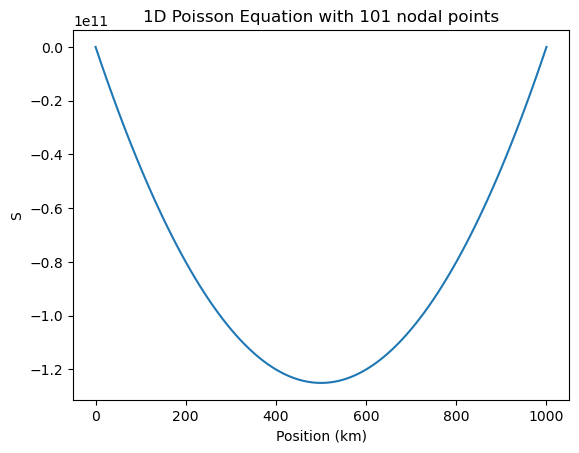

In [130]:
# Plotting solutions
plt.plot(x / 1e3, S)
plt.xlabel('Position (km)')
plt.ylabel('S')
plt.title('1D Poisson Equation with 101 nodal points')
plt.show()

exercise 3.2 : 2D Poisson

In [132]:
#size
x_size = 1000
y_size = 1500

#nodes
x_n = 31
y_n = 41

In [133]:
dx = x_size / (x_n - 1)
dy = y_size / (y_n - 1)

In [142]:
L2 = np.zeros((x_n*y_n, x_n*y_n))
L2.shape

(1271, 1271)

In [143]:
R2 = np.zeros((x_n*y_n, 1))
R2.shape

(1271, 1)

In [144]:
# Finite difference method
for i in range(x_n):
    for j in range(y_n):
        n = i + j * x_n
        if i == 0 or i == x_n - 1 or j == 0 or j == y_n - 1:
            L2[n, n] = 1.0
            R2[n] = 0.0
        else:
            L2[n, n] = -2.0 / dx**2 - 2.0 / dy**2
            L2[n, n - 1] = 1.0 / dx**2
            L2[n, n + 1] = 1.0 / dx**2
            L2[n, n - x_n] = 1.0 / dy**2
            L2[n, n + x_n] = 1.0 / dy**2
            #right-hand side vector can be set to any function we're solving for
            R2[n] = 1.0

In [147]:
S2 = np.linalg.solve(L2, R2)
S2.shape

(1271, 1)

In [155]:
# Reshapes the solution into a 2D array
xy = np.reshape(S2, (y_n, x_n))
xy.shape

(41, 31)

In [161]:
from mpl_toolkits.mplot3d import Axes3D

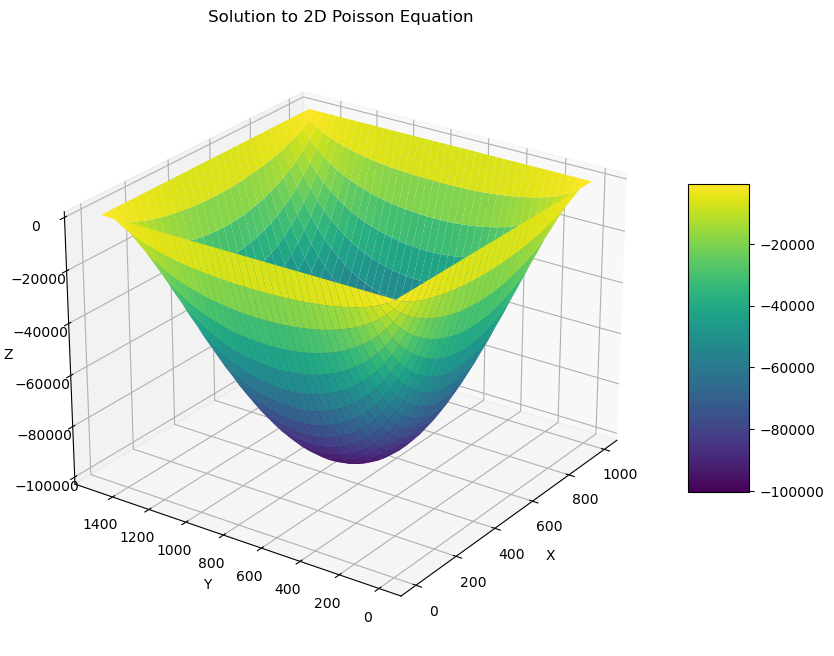

In [178]:
# Plotting
x_axis = np.linspace(0, x_size, x_n)
y_axis = np.linspace(0, y_size, y_n)
X_grid, Y_grid = np.meshgrid(x_axis, y_axis)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_grid, Y_grid, xy, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('Solution to 2D Poisson Equation')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# axis properties
ax.tick_params(axis='both', direction='out', width=1.5)
ax.view_init(elev=25, azim=215)

plt.show()